<a href="https://colab.research.google.com/github/ilyandho/FPL-Optimal-Transfer/blob/main/FPL_points_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (12,9)

# Read the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fpl_player_data.csv').drop(columns=['Unnamed: 0'])


In [ ]:
# Separate the week to be predicted
##
def get_details(gw):
    # player_data = pd.DataFrame(get_player_data(gw))

    # Separate next gw's data
    next_gw_data = df[df['gw'] == gw]

    # Drop this data from the rest of data
    player_data = df.drop(df[df['gw'] >= gw].index)

    return player_data #, next_gw_data


details = get_details(30)
details

,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam
0,1,1,2,5,4,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
1,2,1,2,5,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
2,3,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
3,4,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
4,5,1,2,5,2,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.02,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21991,835,29,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
21992,836,29,0,0,4,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
21993,837,29,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
21994,838,29,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False


In [ ]:
details.columns

Index(['id', 'gw', 'team_h_difficulty', 'team_a_difficulty', 'position',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'total_points',
       'in_dreamteam'],
      dtype='object')

In [ ]:
player_data = details
# next_gw_data = details[1]
# Of the features, we want to use features that are available at the time the model is running.
# This makes sure that the model only depends on games stats that are available before the match starts.
# These will store in the 'attributes' variable and we will subsquently be using these for the rest of the work.
attributes = ['team_h_difficulty', 'team_a_difficulty', 'position',
              'threat', 'ict_index', 'expected_goals', 'expected_assists',
              'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
players_data = player_data[attributes]
players_data


,team_h_difficulty,team_a_difficulty,position,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,2,5,4,0.0,0.0,0.0,0.0,0.0,0.00,0
1,2,5,2,0.0,0.0,0.0,0.0,0.0,0.00,0
2,2,5,3,0.0,0.0,0.0,0.0,0.0,0.00,0
3,2,5,3,0.0,0.0,0.0,0.0,0.0,0.00,0
4,2,5,2,0.0,0.0,0.0,0.0,0.0,0.02,1
...,...,...,...,...,...,...,...,...,...,...
21991,0,0,1,0.0,0.0,0.0,0.0,0.0,0.00,0
21992,0,0,4,0.0,0.0,0.0,0.0,0.0,0.00,0
21993,0,0,2,0.0,0.0,0.0,0.0,0.0,0.00,0
21994,0,0,2,0.0,0.0,0.0,0.0,0.0,0.00,0


In [ ]:
# Group the players by position
# Here we will train models for each position i.e each position will have its own model for predicting the data
goalkeepers = players_data.loc[players_data['position'] == 1].drop('position', axis='columns')
gk_feature = goalkeepers.drop('total_points', axis='columns')
gk_target = goalkeepers['total_points']


defenders = players_data.loc[players_data['position'] == 2].drop('position', axis='columns')
def_feature = defenders.drop('total_points', axis='columns')
def_target = defenders['total_points']


midfielders = players_data.loc[players_data['position'] == 3].drop('position', axis='columns')
mid_feature = midfielders.drop('total_points', axis='columns')
mid_target = midfielders['total_points']


forwards = players_data.loc[players_data['position'] == 4].drop('position', axis='columns')
for_feature = forwards.drop('total_points', axis='columns')
for_target = forwards['total_points']

### Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split

# goalkeepers
gk_ft_train, gk_ft_test, gk_tar_train, gk_tar_test = train_test_split(gk_feature, gk_target,
                                                   test_size=0.3, shuffle=True,
                                                   random_state=42)

# defenders
def_ft_train, def_ft_test, def_tar_train, def_tar_test = train_test_split(def_feature, def_target,
                                                   test_size=0.3, shuffle=True,
                                                  random_state=42)

# midfielders
mid_ft_train, mid_ft_test, mid_tar_train, mid_tar_test = train_test_split(mid_feature, mid_target,
                                                   test_size=0.3, shuffle=True,
                                                   random_state=42)

# forwards
for_ft_train, for_ft_test, for_tar_train, for_tar_test = train_test_split(for_feature, for_target,
                                                   test_size=0.3, shuffle=True,
                                                   random_state=42)

# Baseline model: Gradient Boosting Classifier with all features

## Goalkeepers

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Initialize classifier
rfr = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

# Train classifier using all features
rfr.fit(for_ft_train, for_tar_train)

# Make predictions
preds = rfr.predict(for_ft_test)

# Evaluate the model using the F1-score
# f1_score_all = round(f1_score(for_tar_test, preds, average='weighted'), 3)

rfr.score(for_ft_test, for_tar_test)

0.7913881560560325

### Feature selection techniques

#### Variance threshold

In [ ]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = for_ft_train.copy(), for_ft_test.copy(), for_tar_train.copy(), for_tar_test.copy()

In [ ]:
# Calculate the variance of each feature
X_train_v1.var(axis=0)

team_h_difficulty               1.040699
team_a_difficulty               1.411674
threat                        297.855745
ict_index                      12.266153
expected_goals                  0.071686
expected_assists                0.005823
expected_goal_involvements      0.089288
expected_goals_conceded         0.526765
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

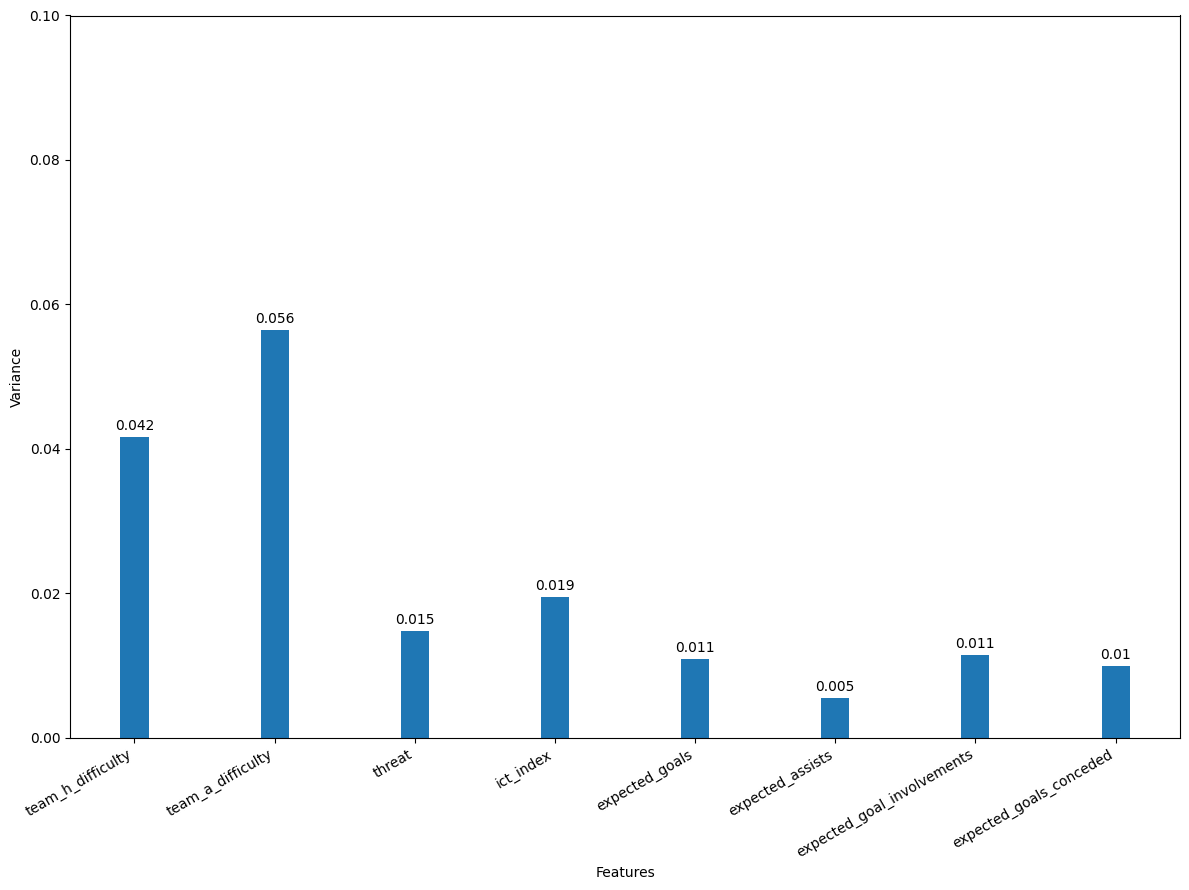

In [ ]:
fig, ax = plt.subplots()

x = gk_feature.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

for index, value in enumerate(y):
    plt.text(x=index, y = value + 0.001, s=str(round(value, 3)), ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
sel_X_train_v1 = X_train_v1.drop(['expected_assists', 'expected_goals_conceded'], axis=1) # X_train_v1, X_test_v1, y_tain_v1, y_test_v1
sel_X_test_v1 = X_test_v1.drop(['expected_assists', 'expected_goals_conceded'], axis=1)

rfr.fit(sel_X_train_v1, for_tar_train) # ['threat', 'expected_goals', 'expected_assists', 'expected_goal_involvements']

var_preds = rfr.predict(sel_X_test_v1)


rfr.score(sel_X_test_v1, for_tar_test)

0.8004333412020026

#### K-best features

In [ ]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = for_ft_train.copy(), for_ft_test.copy(), for_tar_train.copy(), for_tar_test.copy()

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

score_list  = []

for k in range(1, 8):
  selector = SelectKBest(mutual_info_regression, k=k)
  selector.fit(X_train_v2, y_train_v2)

  sel_X_train_v2 = selector.transform(X_train_v2)
  sel_X_test_v2 = selector.transform(X_test_v2)

  rfr.fit(sel_X_train_v2, y_train_v2)

  score = round(rfr.score(sel_X_test_v2, y_test_v2 ), 3)

  score_list.append(score)


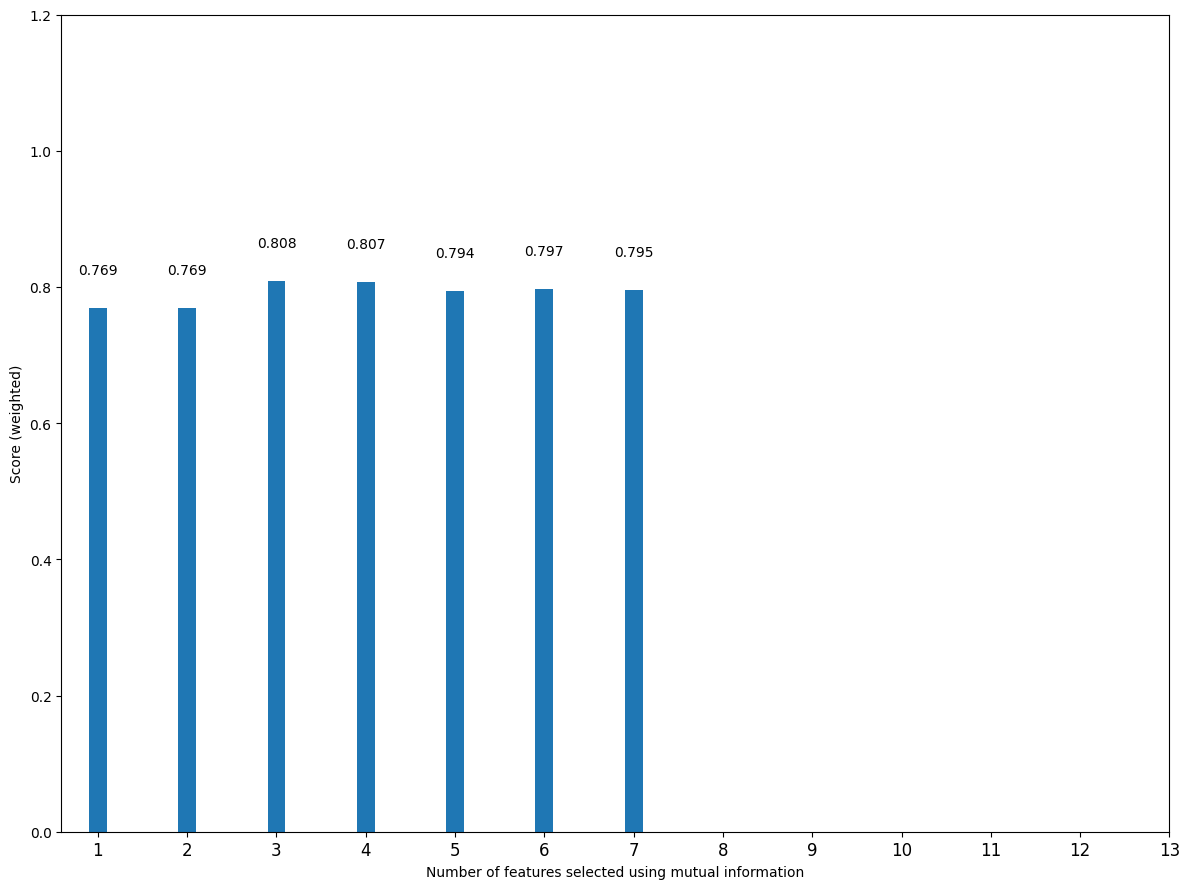

In [ ]:
fig, ax = plt.subplots()
x = np.arange(1,8)
y = score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

In [ ]:
selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['threat', 'ict_index', 'expected_goal_involvements',
       'expected_goals_conceded'],
      dtype='object')

In [ ]:
sel_X_train_v1 = X_train_v1.drop(['threat', 'expected_goals', 'expected_assists', 'expected_goal_involvements'], axis=1) # X_train_v1, X_test_v1, y_tain_v1, y_test_v1
sel_X_test_v1 = X_test_v1.drop(['threat', 'expected_goals', 'expected_assists', 'expected_goal_involvements'], axis=1)

rfr.fit(sel_X_train_v1, gk_tar_train)

var_preds = rfr.predict(sel_X_test_v1)


rfr.score(sel_X_test_v1, gk_tar_test)

0.6122455832950443

# Data collection

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fpl_player_data.csv').drop(columns=['Unnamed: 0'])

In [6]:
# Separate the week to be predicted
##
def get_details(gw):
    # player_data = pd.DataFrame(get_player_data(gw))

    # Separate next gw's data
    next_gw_data = df[df['gw'] == gw]

    # Drop this data from the rest of data
    player_data = df.drop(df[df['gw'] >= gw].index)

    return player_data #, next_gw_data


details = get_details(39)
details.head()

,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam
0,1,1,2,5,4,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
1,2,1,2,5,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
2,3,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
3,4,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,False
4,5,1,2,5,2,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.02,1,False


In [7]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29679 entries, 0 to 29678
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          29679 non-null  int64  
 1   gw                          29679 non-null  int64  
 2   team_h_difficulty           29679 non-null  int64  
 3   team_a_difficulty           29679 non-null  int64  
 4   position                    29679 non-null  int64  
 5   minutes                     29679 non-null  int64  
 6   goals_scored                29679 non-null  int64  
 7   assists                     29679 non-null  int64  
 8   clean_sheets                29679 non-null  int64  
 9   goals_conceded              29679 non-null  int64  
 10  own_goals                   29679 non-null  int64  
 11  penalties_saved             29679 non-null  int64  
 12  penalties_missed            29679 non-null  int64  
 13  yellow_cards                296

#Data pre-processing

In [8]:
player_data = details.copy()
# next_gw_data = details[1]
# Of the features, we want to use features that are available at the time the model is running.
# This makes sure that the model only depends on games stats that are available before the match starts.
# These will store in the 'attributes' variable and we will subsquently be using these for the rest of the work.
attributes = ['id','gw','team_h_difficulty', 'team_a_difficulty', 'position', 'minutes',  'goals_scored',
              'assists',  'clean_sheets',  'goals_conceded', 'own_goals', 'penalties_saved',
              'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
              'threat', 'ict_index', 'starts','expected_goals', 'expected_assists',
              'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
player_data = player_data[attributes]
player_data

,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,1,1,2,5,4,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0
1,2,1,2,5,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0
2,3,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0
3,4,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0
4,5,1,2,5,2,4,0,0,0,0,...,0.2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,862,38,3,2,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0
29675,863,38,2,5,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0
29676,864,38,3,2,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0
29677,865,38,3,3,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0


In [ ]:
# minutes,  'goals_scored',  'assists',  'clean_sheets',  'goals_conceded', 'own_goals', 'penalties_saved',
# 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity','threat'

def prev_3(feats, data): # create a feature that data in last 3 gws
  data = data.copy()
  for feat in feats:
    for id_ in data['id'].unique(): # number of players
        a = 0
        b = 0
        c = 0

        for gw in data['gw'].unique():
            # Check if the player has details for gw = j
            if len(data[(data['id']== id_) & (data['gw'] == gw)]):
                data.loc[(data['id']== id_) & (data['gw'] == gw), 'minutes_3'] = a + b + c # df.loc[df['A'] > 2, 'B'] = new_val
                a=b
                b=c
                c = data[(data['id']== id_) & (data['gw'] == gw)]['minutes'].values[0]

  return data

In [ ]:
feats = ['minutes',  'goals_scored',  'assists',  'clean_sheets',  'goals_conceded', 'own_goals', 'penalties_saved',
        'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity','threat']

prev_3(feats, player_data)

,id,gw,team_h_difficulty,team_a_difficulty,position,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,minutes_3
0,1,1,2,5,4,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0
1,2,1,2,5,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0
2,3,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0
3,4,1,2,5,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0
4,5,1,2,5,2,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.02,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,862,38,3,2,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0
29675,863,38,2,5,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0
29676,864,38,3,2,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0
29677,865,38,3,3,3,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0,0.0


In [15]:
def prev_5(feats, data): # create a feature that data in last 3 gws
  data = data.copy()
  data = data.sort_values(by=['id', 'gw'])  # Sort by ID and gameweek
  for feat in feats:
    data[feat+'_3'] = (
        data.groupby(['id'])[feat]
        .rolling(3, min_periods=1, closed='left').sum()).reset_index(level=0, drop=True).fillna(data[feat])
  return data

In [16]:
feats = ['minutes',  'goals_scored',  'assists',  'clean_sheets',  'goals_conceded', 'own_goals', 'penalties_saved',
        'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity','threat']

y = prev_5(feats, player_data)
player_data_3 = y.drop(feats, axis=1)
player_data_3


,id,gw,team_h_difficulty,team_a_difficulty,position,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,...,penalties_saved_3,penalties_missed_3,yellow_cards_3,red_cards_3,saves_3,bonus_3,bps_3,influence_3,creativity_3,threat_3
0,1,1,2,5,4,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,1,2,5,3,4,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,1,3,2,5,4,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,1,4,3,5,4,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2716,1,5,5,3,4,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,862,38,3,2,3,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29675,863,38,2,5,1,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29676,864,38,3,2,3,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29677,865,38,3,3,3,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Split data by positions
df_gk = player_data_3.loc[player_data_3['position'] == 1].drop('position', axis='columns')
print(df_gk.shape)

df_def = player_data_3.loc[player_data_3['position'] == 2].drop('position', axis='columns')
print(df_def.shape)

df_mid = player_data_3.loc[player_data_3['position'] == 3].drop('position', axis='columns')
print(df_mid.shape)

df_for = player_data_3.loc[player_data_3['position'] == 4].drop('position', axis='columns')
print(df_for.shape)

(3407, 27)
(9597, 27)
(12826, 27)
(3849, 27)


## Goalkeepers


<Axes: >

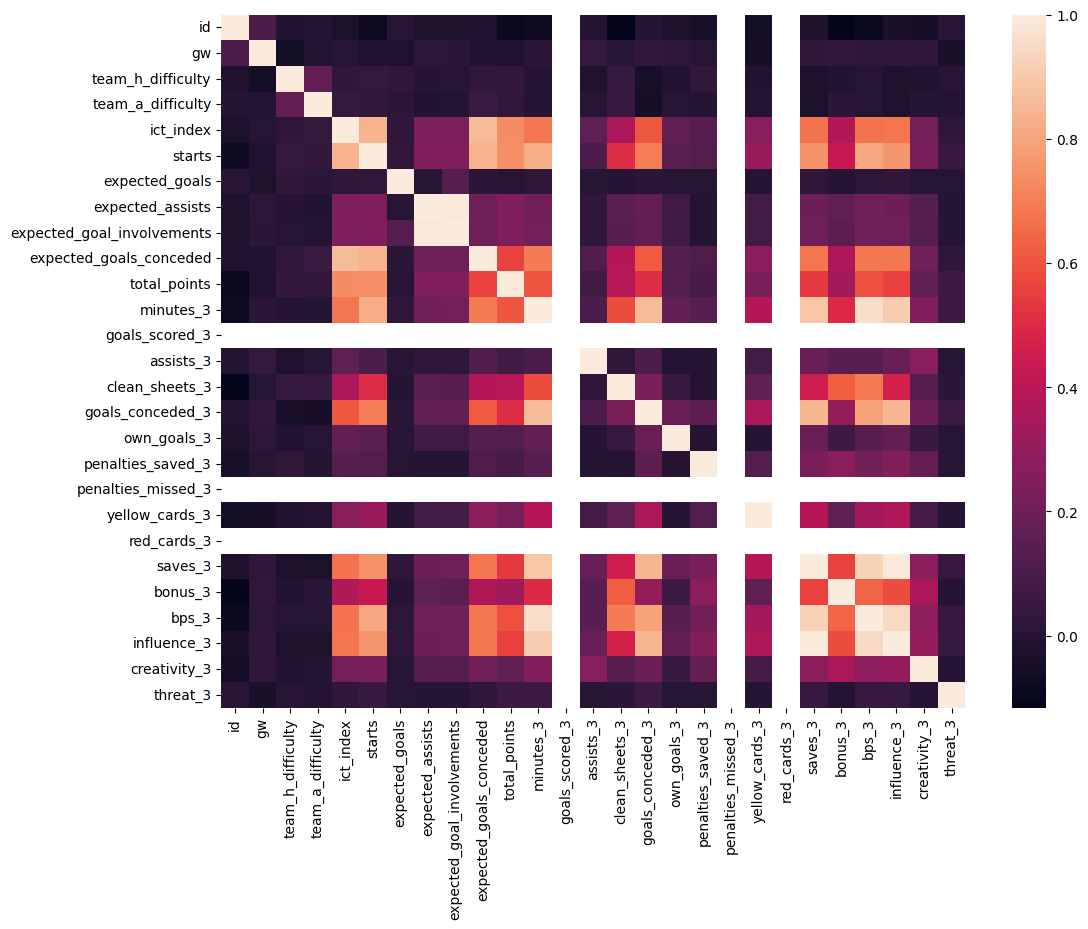

In [18]:
corr_gk = df_gk.corr()
sns.heatmap(corr_gk)

<ipython-input-21-369ca779e0e9>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_gk.penalties_missed_3, fill=True, ax=axs[2,0])
<ipython-input-21-369ca779e0e9>:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_gk.red_cards_3, fill=True, ax=axs[2,2])


<Axes: xlabel='expected_goals_conceded', ylabel='Density'>

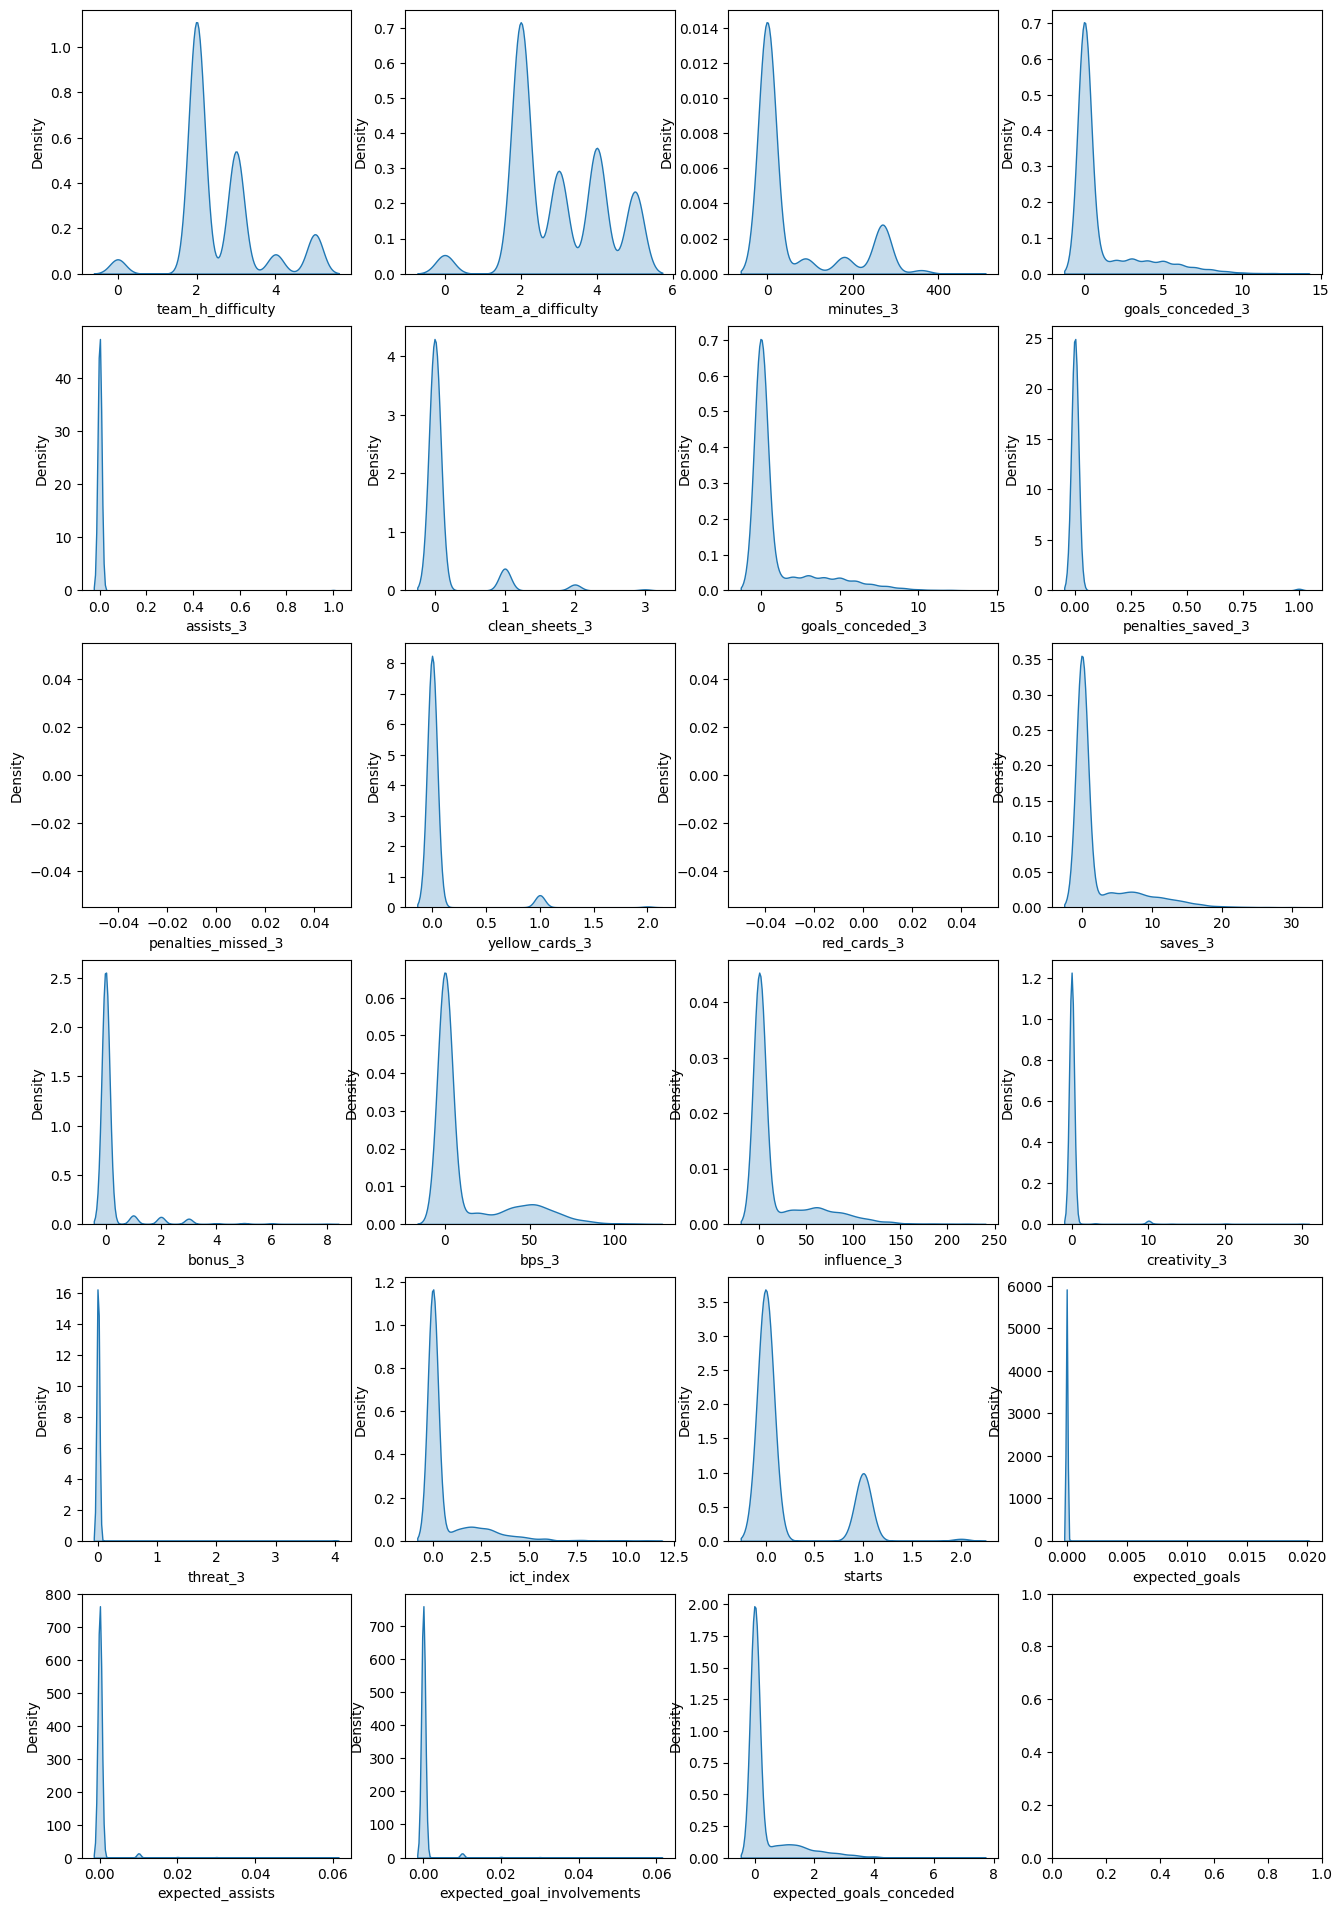

In [21]:
# Plot a comparison
fig, axs = plt.subplots(6, 4, figsize=(16, 24))
sns.kdeplot(df_gk.team_h_difficulty, fill=True, ax=axs[0,0])
sns.kdeplot(df_gk.team_a_difficulty, fill=True, ax=axs[0,1])
sns.kdeplot(df_gk.minutes_3, fill=True, ax=axs[0,2])
sns.kdeplot(df_gk.goals_conceded_3, fill=True, ax=axs[0,3])

sns.kdeplot(df_gk.assists_3, fill=True, ax=axs[1,0])
sns.kdeplot(df_gk.clean_sheets_3, fill=True, ax=axs[1, 1])
sns.kdeplot(df_gk.goals_conceded_3, fill=True, ax=axs[1,2])
sns.kdeplot(df_gk.penalties_saved_3, fill=True, ax=axs[1,3])

sns.kdeplot(df_gk.penalties_missed_3, fill=True, ax=axs[2,0])
sns.kdeplot(df_gk.yellow_cards_3, fill=True, ax=axs[2,1])
sns.kdeplot(df_gk.red_cards_3, fill=True, ax=axs[2,2])
sns.kdeplot(df_gk.saves_3, fill=True, ax=axs[2,3])


sns.kdeplot(df_gk.bonus_3, fill=True, ax=axs[3,0])
sns.kdeplot(df_gk.bps_3, fill=True, ax=axs[3,1])
sns.kdeplot(df_gk.influence_3, fill=True, ax=axs[3,2])
sns.kdeplot(df_gk.creativity_3, fill=True, ax=axs[3,3])

sns.kdeplot(df_gk.threat_3, fill=True, ax=axs[4,0])
sns.kdeplot(df_gk.ict_index, fill=True, ax=axs[4,1])
sns.kdeplot(df_gk.starts, fill=True, ax=axs[4,2])
sns.kdeplot(df_gk.expected_goals, fill=True, ax=axs[4,3])

sns.kdeplot(df_gk.expected_assists, fill=True, ax=axs[5,0])
sns.kdeplot(df_gk.expected_goal_involvements, fill=True, ax=axs[5,1])
sns.kdeplot(df_gk.expected_goals_conceded, fill=True, ax=axs[5,2])
# sns.kdeplot(df_gk.expected_goals_conceded, fill=True, ax=axs[5,3])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='total_points', ylabel='Density'>

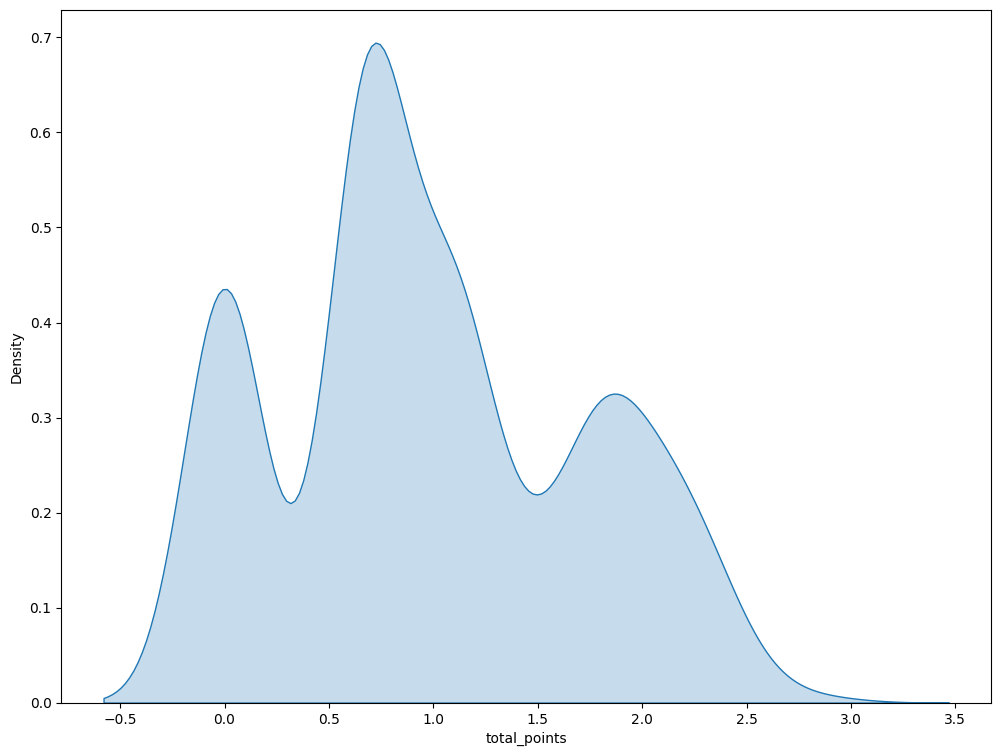

In [31]:
sns.kdeplot(np.log(df_gk.total_points), fill=True)

# Feature engineering

# Model selection

# Model training

# Model evaluation